### Download and data exploration

Import the right libraries

In [43]:
import scanpy as sc
import squidpy as sq
import pathlib
import matplotlib.pyplot as plt

# comment out following lines if throw error
%load_ext autoreload
%autoreload 2
%load_ext lab_black

To download the data, simply use the function below, selecting the tissue of interest. If you are to work with the large tissue image, you might want to go on and set to true `include_hires_tiff` arg. The image is quite large (500Mb<x<5Gb) so make sure you really want it.

In [2]:
dataset_name = "Parent_Visium_Human_OvarianCancer"
PATH = pathlib.Path("./data")
adata = sc.datasets.visium_sge(dataset_name,include_hires_tiff=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


If you have already download the data, you can use a different function to read it in.

In [37]:
adata = sc.read_visium(PATH / dataset_name, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")

We can then go on and normalize/process dataset. For further info visit [scanpy tutorials](https://scanpy.readthedocs.io/en/stable/tutorials.html) or [malte's paper](https://www.embopress.org/doi/full/10.15252/msb.20188746)

In [9]:
adata.var_names_make_unique()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


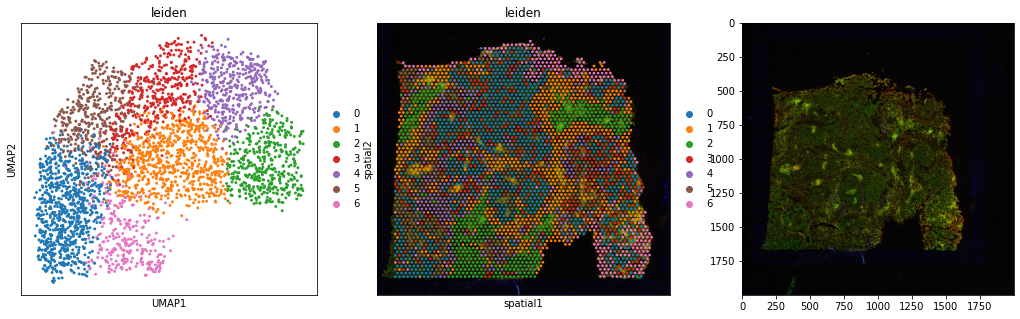

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sc.pl.umap(
    adata,
    color="leiden",
    ax=axs[0],
    show=False,
)
sc.pl.spatial(
    adata,
    color="leiden",
    ax=axs[1],
    show=False,
)
axs[2].imshow(adata.uns["spatial"][dataset_name]["images"]["hires"])

This dataset has a fluorescent image, the other image type is usually HnE. We can check how many channels there are (you can also visit the dataset page in the 10x genomics website to have a look at what are those markers [here](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.2.0/Parent_Visium_Human_OvarianCancer))

(2000, 2000, 3)

We can also read in the image in the appropriate object

In [46]:
img = sq.im.ImageContainer(
    img=PATH / dataset_name / "image.tif", img_id=dataset_name, lazy=True
)
img.shape

(24240, 24240)

This is the large hires image, imported in the `ImageContainer` object. This object is flexible to inspect the large image. ATM it's undergoing a refactoring but should be ready to go by the time you start (there are methods to crop spots, compute image features and else).

10x genomics provide some pre-analysis of the data, you find it in the respective [webpage](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.2.0/Parent_Visium_Human_OvarianCancer). I'm not a big fan of their tools, but of course can be useful to double-check.